In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
import cv2

In [58]:
# Define paths
images_path = r'E:\Thesis\Project\screenshots\20240516_180433'
labels_path = r'E:\Thesis\Project\screenshots\20240516_180433'

# Load the YOLOv8 model
model = YOLO(r'E:\Thesis\Project\src\CVModels\Ultralytics\Models\Minimap500Images100EphocsPatience53\weights\best.pt')

# List of images and labels
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')])
label_files = sorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])


In [59]:
# Function to load ground truth labels
def load_labels(label_file):
    with open(label_file, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        parts = line.strip().split()
        labels.append((int(parts[0]), float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])))
    return labels


In [60]:
# Number of classes
num_classes = 3

# Initialize dictionaries to store true labels and predicted probabilities for each class
y_test_dict = {i: [] for i in range(num_classes)}
y_pred_prob_dict = {i: [] for i in range(num_classes)}

In [70]:
# Run predictions and collect true labels and predicted probabilities
for img_file, label_file in zip(image_files, label_files):
    # Load image
    img_path = os.path.join(images_path, img_file)
    
    # Make predictions
    results = model(img_path)
    
    # Load ground truth labels
    ground_truths = load_labels(os.path.join(labels_path, label_file))
    
    # Extract probabilities and true labels
    for result in results:
        for det in result.boxes:
            class_id = int(det.cls)
            prob = det.conf.item()
            for i in range(num_classes):
                y_pred_prob_dict[i].append(prob if class_id == i else 1 - prob)
                y_test_dict[i].append(1 if class_id == i else 0)

# Plot ROC curve for each class
plt.figure()


image 1/1 E:\Thesis\Project\screenshots\20240516_180433\Image-1.png: 640x640 4 enemys, 3 allys, 1 player, 151.5ms
Speed: 4.2ms preprocess, 151.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 E:\Thesis\Project\screenshots\20240516_180433\Image-10.png: 640x640 4 enemys, 2 allys, 1 player, 117.0ms
Speed: 3.0ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 E:\Thesis\Project\screenshots\20240516_180433\Image-100.png: 640x640 4 enemys, 4 allys, 1 player, 90.2ms
Speed: 3.1ms preprocess, 90.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 E:\Thesis\Project\screenshots\20240516_180433\Image-1000.png: 640x640 4 enemys, 3 allys, 1 player, 88.6ms
Speed: 3.0ms preprocess, 88.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 E:\Thesis\Project\screenshots\20240516_180433\Image-1001.png: 640x640 4 enemys, 3 allys, 1 player, 93.9ms
Speed: 2.0ms preprocess, 93.9

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

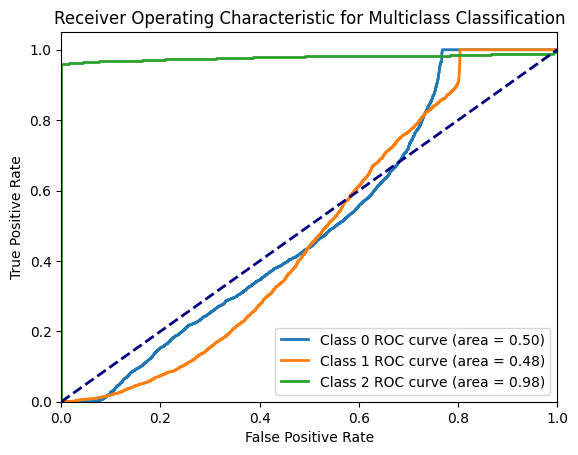

In [75]:
for i in range(num_classes):
    y_test = np.array(y_test_dict[i])
    y_pred_prob = np.array(y_pred_prob_dict[i])
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()